In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt 
from sklearn import linear_model

In [3]:
data = pd.read_csv("C:/Users/Haripreeth Avarur/Downloads/WeightWaist.csv",index_col=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Haripreeth Avarur/Downloads/WeightWaist.csv'

In [4]:
data

NameError: name 'data' is not defined

In [4]:
data.shape

(15, 2)

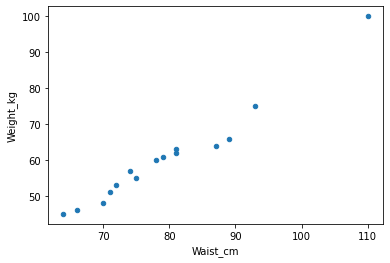

In [5]:
data.plot(kind='scatter', x='Waist_cm', y='Weight_kg')
plt.show()

<AxesSubplot:>

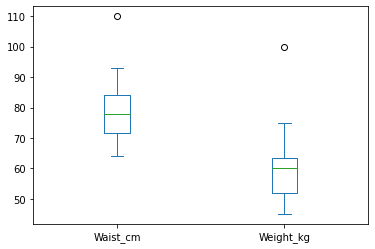

In [6]:
data.plot(kind='box')

In [7]:
data.corr()

,Waist_cm,Weight_kg
Waist_cm,1.000000,0.981216
Weight_kg,0.981216,1.000000


In [8]:
#The Current Dataset is already in a dataframe, if it had been in a array/list format, 
#I would have needed to convert it into a df. So, this is how you convert it generally:

In [1]:
Waist=data.drop("Weight_kg",axis=1)
Weight=data.drop("Waist_cm",axis=1)
Waist

NameError: name 'data' is not defined

In [10]:
Waist=numpy.array(Waist)
Weight=numpy.array(Weight)


In [11]:
Waist

array([[ 71],
       [ 89],
       [ 64],
       [ 74],
       [ 87],
       [ 93],
       [ 79],
       [ 81],
       [ 75],
       [ 72],
       [ 70],
       [ 66],
       [ 81],
       [ 78],
       [110]], dtype=int64)

In [12]:
#Building a linear regression model
lm = linear_model.LinearRegression()
model = lm.fit(Waist, Weight)

In [13]:
model.coef_

array([[1.13470708]])

In [14]:
model.intercept_

array([-29.62009537])

In [15]:
model.score(Waist,Weight)

0.9627843958606758

In [20]:
Waist_new=99
Waist_new=numpy.array(Waist_new)
x=Waist_new.reshape(-1,1)
Weight_predict=model.predict(x)
Weight_predict

array([[82.71590599]])

In [21]:
#Predicting More Values
x=([67,78,94])
x=pd.DataFrame(x)
y=model.predict(x)
y=pd.DataFrame(y)
df=pd.concat([x,y], axis=1, keys=['Waist_new', 'Weight_predicted'])
df

,Waist_new,Weight_predicted
,0,0
0,67,46.405279
1,78,58.887057
2,94,77.042371


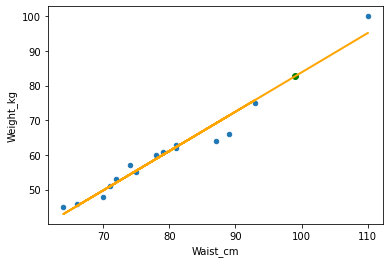

In [22]:
#Visualize the result
data.plot(kind='scatter', x='Waist_cm', y='Weight_kg')
#Plotting the regression line
plt.plot(Waist,model.predict(Waist),color='orange', linewidth=2)
#plotting the predicted value 
plt.scatter(Waist_new,Weight_predict, color='green')
#plt.plot(x,y,color='blue',linewidth=1)
plt.show()